# Predict energy consumption of heating and cooling by weather condition


## Objective:  Predict the heating and cooling energy usage so that we can set a baseline that allow us to improve the energy efficiency

### Background:

Heating and cooling accounts for more than half of the energy use in a typical U.S. home! (http://energy.gov/public-services/homes/heating-cooling). The usage of energy in building heating and cooling is strongly affected by weather conditions, i.e. a hot summer day and a cold winter day will surely use much more energy compare to spring and autumn. 

A company called Opower, they provided a platform to analyze domestic energy consumption in order to let people to compare their energy usage with the past. This concept work very well especially for reduce behavioral usage, e.g. unnecessary usage of electronic appliances, saving energy from unused lighting etc. 

However, in term of the energy usage for building heating and cooling, it is difficult to compare to the past because energy usage is affected by weather, which change from time to time.  For example, the EIA reported that the domestic energy usage percentage for space heating has reduced from 53.1% (1993) to 41.5% (2009) (https://www.eia.gov/todayinenergy/detail.cfm?id=10271), but would that be a cause of global warming? There are many extreme cold days in this winter (due to El Nino event) and I expected that the energy usage for building heating is a lot more compare to last year.

The propose project will use machine learning method to predict energy usage for building heating and cooling from weather information. Then, this prediction model can form a baseline so that we know the performance of energy efficiency for building heating and cooling in the future.

### Business model:

Similar to Opower, we aim to provide a platform for people to analyze their energy usage. However, we will focus on the energy usage in building heating and cooling. Based on the regional weather and the energy usage data, we can form prediction models to predict energy usage for homes.

This platform is aimed to collect domestic energy usage data from people and therefore itself should not be charge at all, i.e. people need to upload their domestic energy usage (ideally with sub meter to building heating and cooling only). However, from the data collected, we can find out the following information and they will be very useful for marketing purpose:

Identify ‘big energy users’ so that we can help them to improve the energy usage efficiency, for example, products that can reduce their heating and cooling energy usage, such as building insulation to avoid heat lost, shading to reduce radiation heat gain etc. 

Identify regions that require less energy for building heating and cooling, which should add extra credit to the property value.

To create a community to improve domestic energy usage efficiency, this group is likely to purchase other ‘green products’ and involve in other environmental friendly events.

Identify the peak usage (based on weather events), which will help power companies to improve their operation, i.e. Power companies can optimize their power generation unit to avoid over production.

### Data used for demonstration 

#### Regional weather data
https://www.wunderground.com/
Paris Orly, France

#### Energy usage data

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner, the data obtained from a house in Clamart, France (Near Paris)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
# Energy consumption data
data = pd.read_csv('household_power_consumption.txt',sep=';')
Pow_con = pd.concat([data['Date'], data['Time'], data['Sub_metering_3']],axis=1)
Pow_data = np.array(Pow_con['Sub_metering_3'][396:2073996])
Pow_dm = Pow_data.reshape((1440,1440))
Pow_daily = np.nansum(Pow_dm,axis=1)

# Standardise Energy consumption
st_Pow_d = (Pow_daily-np.mean(Pow_daily))/np.std(Pow_daily)
st_Pow_d

/Users/calvincheung/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array([ 1.09842249,  1.27716861, -0.78778473, ..., -0.41445088,
        0.80350459, -1.08481484])

In [3]:
np.mean(Pow_daily), np.std(Pow_daily)

(9180.7305555555558, 3787.4947751573377)

In [4]:
# Weather data
wdata = pd.read_csv('obs_Paris.csv')
weather = wdata[0:1440]


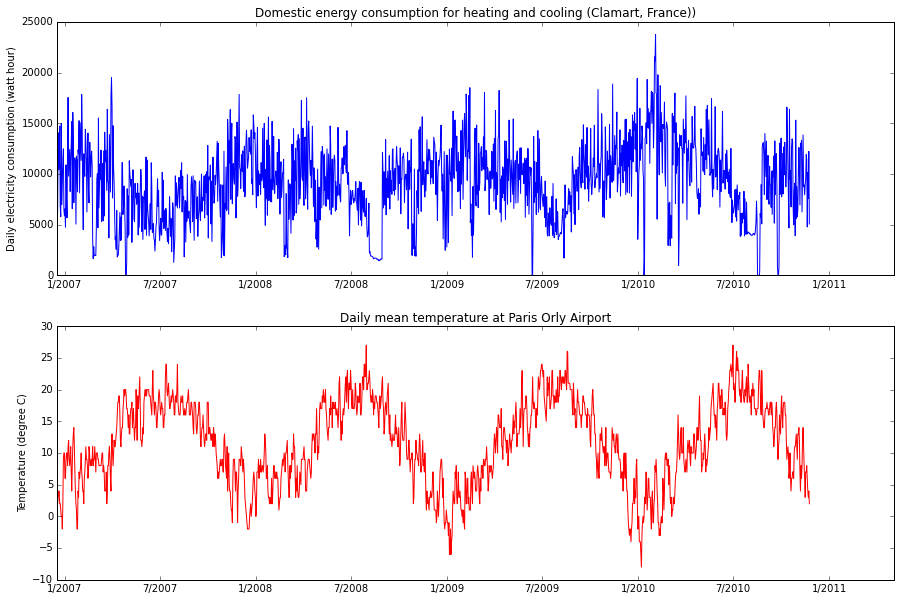

In [5]:
# plot #1 - Compare time series between energy consumption and weather
fig = plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
x = [16,197,381,563,747,928,1112,1293,1477]
labels = ['1/2007', '7/2007','1/2008', '7/2008','1/2009', '7/2009','1/2010', '7/2010','1/2011']
#plt.plot(Pow_daily)
plt.plot(Pow_daily)
plt.xticks(x, labels)
plt.ylabel('Daily electricity consumption (watt hour)')
plt.title('Domestic energy consumption for heating and cooling (Clamart, France))')

#plt.subplot(2,1,2)
#x = [16,197,381,563,747,928,1112,1293,1477]
#labels = ['1/2007', '7/2007','1/2008', '7/2008','1/2009', '7/2009','1/2010', '7/2010','1/2011']
#plt.plot(st_Pow_d)
#plt.xticks(x, labels)
#plt.ylabel('Daily electricity consumption (watt hour)')
#plt.title('Domestic energy consumption for heating and cooling (Clamart, France))')

plt.subplot(2,1,2)
x = [16,197,381,563,747,928,1112,1293,1477]
labels = ['1/2007', '7/2007','1/2008', '7/2008','1/2009', '7/2009','1/2010', '7/2010','1/2011']
plt.plot(weather['Mean TemperatureC'],color='red')
plt.xticks(x, labels)
plt.ylabel('Temperature (degree C)')
plt.title('Daily mean temperature at Paris Orly Airport')

In [6]:
#DMY = pd.DataFrame(weather['Date'].str.split('/').tolist(),columns="Day Month Year".split())
Ddata = pd.read_csv('date.csv')
DMY = Ddata[0:1440]
Predictors = weather
Predictand = pd.DataFrame(st_Pow_d, columns= ['Power'])
ALL = pd.concat([DMY,Predictors,Predictand], axis=1)

ALL.head()

,Date,Year,Month,Day,Order,Weekday,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,...,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br>,Power
0,17/12/06,2006,12,17,1,7,17/12/06,6,2,-1,...,5,0,11,6,NaN,0,4,Fog,198<br>,1.098422
1,18/12/06,2006,12,18,2,1,18/12/06,5,3,1,...,6,1,16,6,NaN,0,6,NaN,108<br>,1.277169
2,19/12/06,2006,12,19,3,2,19/12/06,5,2,0,...,7,4,24,16,NaN,0,1,NaN,20<br>,-0.787785
3,20/12/06,2006,12,20,4,3,20/12/06,6,3,1,...,NaN,NaN,23,18,NaN,0,NaN,NaN,24<br>,1.289050
4,21/12/06,2006,12,21,5,4,21/12/06,8,4,0,...,9,6,27,16,NaN,0,4,NaN,21<br>,0.327464


In [7]:
Winter = ALL#[(ALL['Month'] < 4) | (ALL['Month'] > 10)]

#Ptors = Winter[['Mean TemperatureC','Min TemperatureC','Max TemperatureC',' Mean Humidity',' Mean Wind SpeedKm/h']]
Ptors = Winter[['Mean TemperatureC','Min TemperatureC','Max TemperatureC',' Mean Sea Level PressurehPa',' Max Wind SpeedKm/h']]

Ptand = Winter['Power']
#Ptors.shape, Ptand.shape
PtorsTrain, PtorsTest, PtandTrain, PtandTest = train_test_split(Ptors, Ptand, test_size = 0.2)
PtorsTrain.shape, PtorsTest.shape, PtandTrain.shape, PtandTest.shape

# Create model to predict energy consumption
SF = 2.3
model = linear_model.LinearRegression()
model.fit(PtorsTrain,PtandTrain)
Result_Train = model.predict(PtorsTrain)*SF
Result_Test = model.predict(PtorsTest)*SF
#PtorsPtand.shape
model.coef_, model.intercept_ 

(array([-0.04384386, -0.00978584, -0.0049414 , -0.00410271,  0.00268917]),
 4.7652455252852404)

/Users/calvincheung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


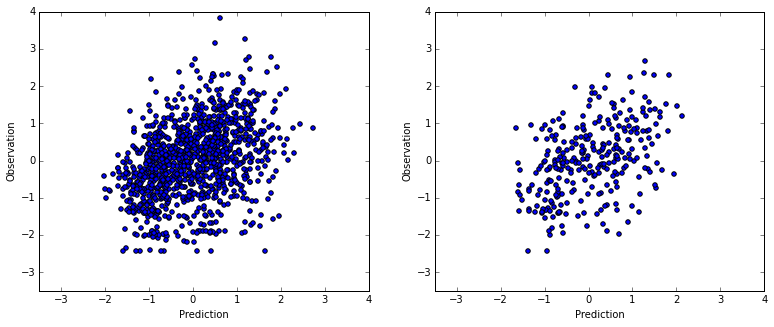

In [8]:
fig = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(Result_Train,PtandTrain)
plt.xlim(-3.5,4), plt.ylim(-3.5,4)
plt.xlabel('Prediction');plt.ylabel('Observation');
plt.subplot(1,2,2)
plt.scatter(Result_Test,PtandTest)
plt.xlim(-3.5,4), plt.ylim(-3.5,4)
plt.xlabel('Prediction');plt.ylabel('Observation');

/Users/calvincheung/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/calvincheung/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/calvincheung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


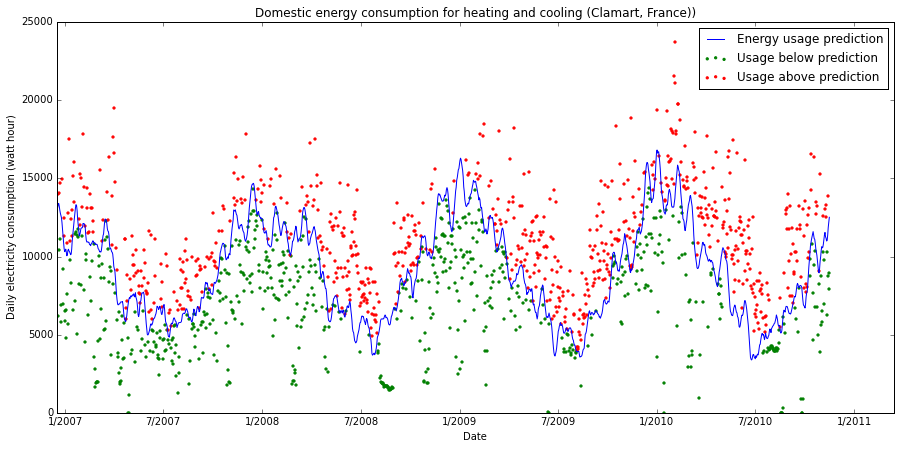

In [9]:
Result_final = model.predict(Ptors)*SF
Prediction = (Result_final*np.std(Pow_daily))+np.mean(Pow_daily)

# moving average plot
window = 10
weights = np.repeat(1.0, window)/window
Prediction2 = np.convolve(Prediction, weights, 'valid')

ALL2 = ALL[0:1431]
ALL2['PredE'] = Prediction2
ALL2['PowCon'] = Pow_daily[0:1431]

Below = ALL2[ALL2['PowCon'] < ALL2['PredE']]
Above = ALL2[ALL2['PowCon'] > ALL2['PredE']]

fig = plt.figure(figsize=(15,7))
x = [16,197,381,563,747,928,1112,1293,1477]
labels = ['1/2007', '7/2007','1/2008', '7/2008','1/2009', '7/2009','1/2010', '7/2010','1/2011']

plt.plot(ALL2['Order'],ALL2['PredE'], color = 'b',label = 'Energy usage prediction')

plt.scatter(Below['Order'],Below['PowCon'], marker='.', color = 'green', label = 'Usage below prediction')
plt.scatter(Above['Order'],Above['PowCon'], marker='.', color = 'red', label = 'Usage above prediction')
plt.legend()
plt.xticks(x, labels)
plt.axis([0,1550,0,25000])
plt.xlabel('Date')
plt.ylabel('Daily electricity consumption (watt hour)')
plt.title('Domestic energy consumption for heating and cooling (Clamart, France))')

plt.savefig("figure1.pdf")

In [10]:
MonthA = Above.groupby(['Month']).Order.count()
MonthB = Below.groupby(['Month']).Order.count()
WdayA = Above.groupby(['Weekday']).Order.count()
WdayB = Below.groupby(['Weekday']).Order.count()
YearA = Above.groupby(['Year']).Order.count()/ALL.groupby(['Year']).Order.count()
YearB = Below.groupby(['Year']).Order.count()/ALL.groupby(['Year']).Order.count()
EventA = Above.groupby([' Events']).Order.count()
EventB = Below.groupby([' Events']).Order.count()

Event = ALL2.groupby([' Events']).Order.count()
Event.index

Index(['Fog', 'Fog-Rain', 'Fog-Rain-Hail-Thunderstorm', 'Fog-Rain-Snow',
       'Fog-Rain-Thunderstorm', 'Fog-Snow', 'Fog-Thunderstorm', 'Rain',
       'Rain-Hail-Thunderstorm', 'Rain-Snow', 'Rain-Snow-Hail',
       'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm', 'Snow', 'Thunderstorm'],
      dtype='object', name=' Events')

In [11]:
EventCountA = np.zeros(15)
EventCountB = np.zeros(15)

for i in range(0,15):
    EventCountA[i] = Above[(Above[' Events']) == Event.index[i]].Order.count()
    EventCountB[i] = Below[(Below[' Events']) == Event.index[i]].Order.count()


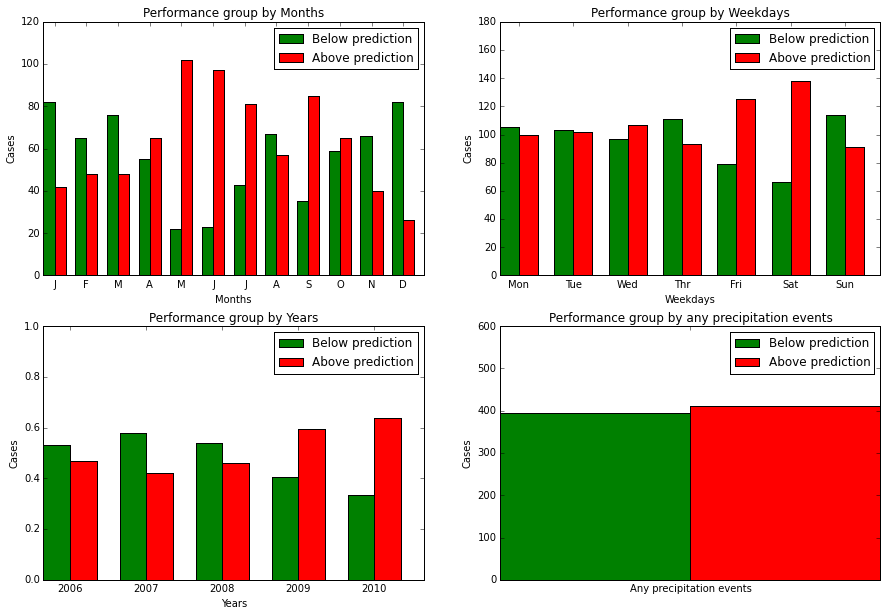

In [12]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
N = 12
labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
Below = np.array(MonthB)
Above = np.array(MonthA)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
rects1 = plt.bar(ind, Below, width, color='g')
rects2 = plt.bar(ind + width, Above, width, color='r')
plt.ylabel('Cases')
plt.xlabel('Months')
plt.title('Performance group by Months')
plt.xticks(ind + width, labels)
plt.legend((rects1[0], rects2[0]), ('Below prediction', 'Above prediction'))

plt.subplot(2,2,2)
N = 7
labels = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
Below = np.array(WdayB)
Above = np.array(WdayA)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
rects1 = plt.bar(ind, Below, width, color='g')
rects2 = plt.bar(ind + width, Above, width, color='r')
plt.ylabel('Cases')
plt.xlabel('Weekdays')
plt.ylim([0,180])
plt.title('Performance group by Weekdays')
plt.xticks(ind + width, labels)
plt.legend((rects1[0], rects2[0]), ('Below prediction', 'Above prediction'))

plt.subplot(2,2,3)
N = 5
labels = ['2006','2007','2008','2009','2010']
Below = np.array(YearB)
Above = np.array(YearA)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
rects1 = plt.bar(ind, Below, width, color='g')
rects2 = plt.bar(ind + width, Above, width, color='r')
plt.ylabel('Cases')
plt.xlabel('Years')
plt.ylim([0,1])
plt.title('Performance group by Years')
plt.xticks(ind + width, labels)
plt.legend((rects1[0], rects2[0]), ('Below prediction', 'Above prediction'))

plt.subplot(2,2,4)
N = 1
labels = ['Any precipitation events']
Below = EventB.sum()
Above = EventA.sum()
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
rects1 = plt.bar(ind, Below, width, color='g')
rects2 = plt.bar(ind + width, Above, width, color='r')
plt.ylabel('Cases')
#plt.xlabel('Years')
plt.ylim([0,600])
plt.title('Performance group by any precipitation events')
plt.xticks(ind + width, labels)
plt.legend((rects1[0], rects2[0]), ('Below prediction', 'Above prediction'))

plt.savefig("figure2.pdf")